## Index of Economic Freedom

This notebook explores regression analysis using scikit-learn.

My synopsis for the exploratory data analysis in Script No 02 already showed a strong correlation between "Property Rights" and "Overall Score". Based on this previous analysis, I formulated the hypothesis: "The higher the scoring for Property Rights, the higher the Overall Score for Economic Freedom". 

In this notebook I want to test the assumption that the relationship between "Property Rights" and "Overall Score" follows a linear fashion.

### Contents of this notebook
#### 01. Importing libraries
#### 02. Importing dataframe
#### 03. Data checks
#### 04. Data prep for regression analysis
#### 05. Regression analysis
#### 06. Performance improvement after improving outliers?

### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 02. Importing dataframe

In [3]:
df_freedom = pd.read_excel(r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Prepared Data\data-economic-freedom-median.xlsx', index_col=False)

In [4]:
df_freedom.shape

(5152, 19)

In [5]:
df_freedom.head()

,Unnamed: 0,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,0,Afghanistan,33.939110,67.709953,2022,59.6,50.0,34.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


In [6]:
# Dropping the index column

df_freedom.drop(df_freedom.columns[0], axis=1, inplace =True)

In [7]:
df_freedom.head()

,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,Afghanistan,33.939110,67.709953,2022,59.6,50.0,34.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


### 03. Data checks

In [8]:
# Checking for missing values

df_freedom.isnull().sum()

Name                           0
Latitude                       0
Longitude                      0
Index Year                     0
Overall Score                  0
Property Rights                0
Government Integrity           0
Judicial Effectiveness      4053
Tax Burden                   518
Government Spending          502
Fiscal Health               4060
Business Freedom             485
Labor Freedom               1979
Monetary Freedom             496
Trade Freedom                511
Investment Freedom           496
Financial Freedom            518
Property Rights Category     905
dtype: int64

In the previous script No 03 I already imputed the missing values for "Property Rights" with the median.

C:\Users\veren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property Rights', ylabel='Density'>

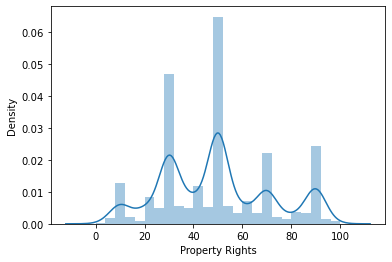

In [9]:
# Checking for extreme values in "Property Rights"

sns.distplot(df_freedom['Property Rights'], bins=25)

Some of the outliers (extremely high values) may need to be removed, but let's try without doing so first.

C:\Users\veren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Overall Score', ylabel='Density'>

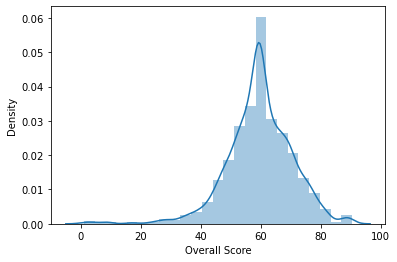

In [10]:
# Checking for extreme values in "Overall Score"

sns.distplot(df_freedom['Overall Score'], bins=25)

One outlier value may need to be removed, but let's try without doing so first.

In [11]:
# Checking the mean, median and the max for "Overall score" and "Property Rights"

df_freedom[['Overall Score', 'Property Rights']].describe()

,Overall Score,Property Rights
count,5152.000000,5152.000000
mean,59.625000,49.001281
std,11.087575,22.391322
min,1.000000,0.000000
25%,53.800000,30.000000
50%,59.600000,50.000000
75%,66.400000,65.000000
max,90.500000,100.000000


### 04. Data prep for regression analysis

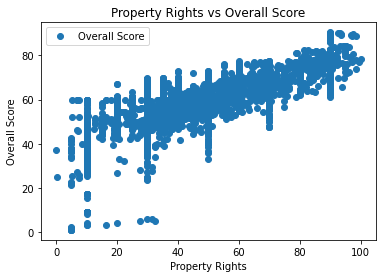

In [12]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_freedom.plot(x = 'Property Rights', y='Overall Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Property Rights vs Overall Score')  
plt.xlabel('Property Rights')  
plt.ylabel('Overall Score')  
plt.show()

One can already see a general trend in the relationship between the two variables. The point of the regression analysis is to prove if the trend really exists.

In [13]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_freedom['Property Rights'].values.reshape(-1,1)
y = df_freedom['Overall Score'].values.reshape(-1,1)

In [14]:
X

array([[50. ],
       [55.5],
       [27.9],
       ...,
       [30. ],
       [50. ],
       [50. ]])

In [15]:
y

array([[59.6],
       [66.6],
       [45.8],
       ...,
       [49.8],
       [55.1],
       [48.5]])

In [16]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 05. Regression analysis

In [17]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train) # training the model

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test) # using the model on the test data set to predict some y values and see how accurate they are.

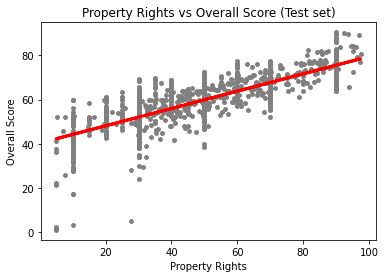

In [20]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Property Rights vs Overall Score (Test set)')
plot_test.xlabel('Property Rights')
plot_test.ylabel('Overall Score')
plot_test.show()

In [21]:
# In order to check the accuracy of the model, I'm checking its performance in more ways than just visually.
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Printing the model's summary statistics. This is where I evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.39203388]]
Mean squared error:  44.18128039707919
R2 score:  0.6397295070881344


The **slope coefficient** indicates how the y variable changes when X changes. This indicates a **moderate positive linear relationship**.

The **root mean squared error (MSE)** is an estimator that measures the average of the squared difference between the estimated values and the true values. Put more simply, it states how close a regression line is to a set of points (i.e., its accuracy). A small MSE, however, means that the regression line passes fairly close to the observations, making it a good fit. I would interpret 44.2 as a small/moderate MSE, so **the linear regression line is a fairly good fit** for this analysis.

The **R2 score** or R squared is a metric that shows how well the model explains the variance in the data. It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. Since 0.6 is closer to 1 than to zero, **the fit is moderate**.

In [23]:
# Making a dataframe of y values and their predicted values to further see the performance of the model 

y_predicted

array([[53.00239058],
       [62.64642404],
       [42.26066225],
       ...,
       [72.72169477],
       [48.14117046],
       [52.06150927]])

In [24]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,47.4,53.002391
1,64.1,62.646424
2,37.6,42.260662
3,70.9,67.742864
4,59.6,59.902187
5,70.0,75.583542
6,59.6,59.902187
7,61.1,61.274305
8,49.7,59.902187
9,64.5,52.061509


This output shows there’s **quite the difference between the actual and predicted y values**. This is evidence that the model isn’t doing a great job of explaining the relationship between the “Property Rights” and “Overall Score” variables. **The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything!).**

In [25]:
# Comparing how the regression fits the training set
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.39203388]]
Mean squared error:  46.437339518006674
R2 score:  0.6225361573278421


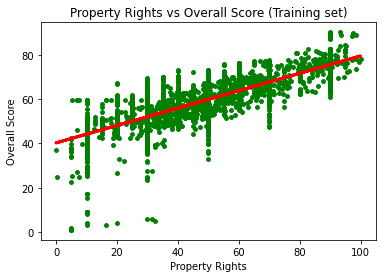

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Property Rights vs Overall Score (Training set)')
plot_test.xlabel('Property Rights')
plot_test.ylabel('Overall Score')
plot_test.show()

### 06. Performance improvement after removing outliers?

In [29]:
# Cleaning the extreme values from the "Overall Score" variable observed during the consistency checks.

df_test = df_freedom[df_freedom['Overall Score'] <=60] 

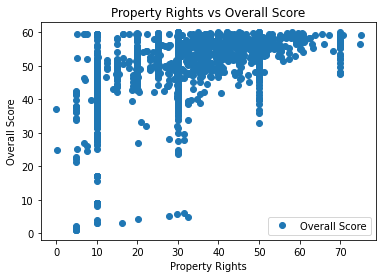

In [30]:
# Checking how the scatterplot looks without the outliers.

df_test.plot(x = 'Property Rights', y='Overall Score', style='o')  
plt.title('Property Rights vs Overall Score')  
plt.xlabel('Property Rights')  
plt.ylabel('Overall Score')  
plt.show()

In [31]:
# Reshape again.

X_2 = df_test['Property Rights'].values.reshape(-1,1)
y_2 = df_test['Overall Score'].values.reshape(-1,1)

In [32]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [33]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [34]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [35]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.34745286]]
Mean squared error:  45.48554462644543
R2 score:  0.34126505885501146


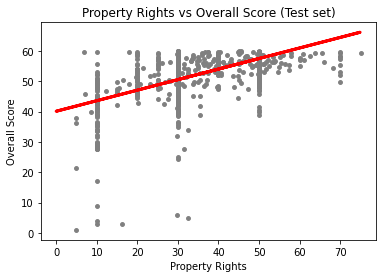

In [37]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Property Rights vs Overall Score (Test set)')
plot_test.xlabel('Property Rights')
plot_test.ylabel('Overall Score')
plot_test.show()

In [38]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,59.0,53.980819
1,57.7,57.455348
2,55.7,50.506291
3,46.7,50.506291
4,45.0,43.557234
5,55.1,53.042697
6,50.6,47.031762
7,56.6,57.455348
8,53.8,50.506291
9,55.9,50.506291


The output still shows quite a difference between the actual and predicted y values. **A linear regression model doesn't seem to be a good fit!**